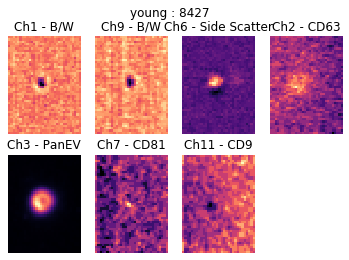

Number of ch1 maxima:  1.0
Number of ch6 maxima:  1.0
Distance from edge:  606.0
Circularity Ch1:  0.06534294204640534
Circularity Ch6:  0.9332470217393124


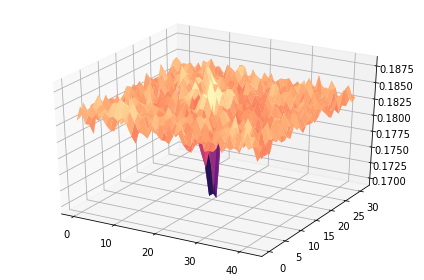

In [33]:
%reload_ext autoreload
from BioAnalysis import BioAnalysis
from BioImage import BioImage

analysis = BioAnalysis()

b = analysis.showRandomFilteredImage()
b.show3D(b.ch1)

In [2]:
analysis.getContingencyMatrix()

Number of Young samples: 3491
Number of Old Samples: 3652


,Young,Old
CD63+,3468.0,3608.0
CD63-,23.0,44.0


p-value: 0.01921224404271519


,Young,Old
CD81+,1598.0,1906.0
CD81-,1893.0,1746.0


p-value: 5.900788852968817e-08


,Young,Old
CD9+,650.0,942.0
CD9-,2841.0,2710.0


p-value: 3.0750563875800547e-13


{'Old': {'Mean': array([  3.08049986,   6.27975897,   6.93791943, 462.29025192,
         418.02929901, 437.46330778]),
  'Var': array([1.68715057e+01, 9.80531748e+00, 1.08135654e+01, 9.47464700e+04,
         5.51282623e+04, 5.38059184e+04])},
 'Young': {'Mean': array([  3.05024606,   6.75918906,   6.76382856, 341.17702664,
         432.3440275 , 442.28186766]),
  'Var': array([2.34644490e+01, 1.08891637e+01, 8.26848288e+00, 7.98709392e+04,
         4.70703741e+04, 4.04117470e+04])}}

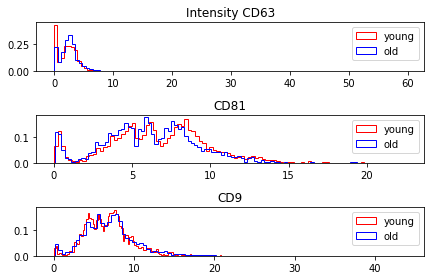

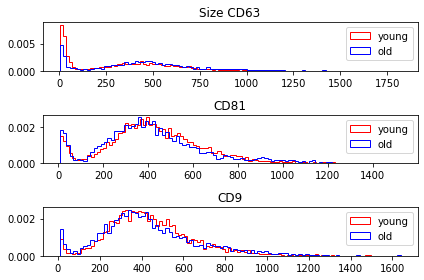

In [3]:
analysis.getTotalIntensityDistribution()

In [ ]:
points_young = analysis.points_young
points_old = analysis.points_old

from scipy.stats import mannwhitneyu
for i in range(0,6):
    young = points_young[:,i]
    old = points_old[:,i]
    print(mannwhitneyu(young, old)[1])
